In [1]:
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"

except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")


[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
torch version: 2.8.0
torchvision version: 0.23.0


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4393, done.
remote: Total 4393 (delta 0), reused 0 (delta 0), pack-reused 4393 (from 1)
Receiving objects: 100% (4393/4393), 764.14 MiB | 774.00 KiB/s, done.
Resolving deltas: 100% (2656/2656), done.
Updating files: 100% (248/248), done.


/Library/anaconda3/envs/my_first_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import os
import zipfile

from pathlib import Path
import requests

data_path = Path("food_data/")
img_path = data_path / "pizza_steak_sushi"
# Setup Dirs
train_dir = img_path / "train"
test_dir = img_path / "test"

In [6]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [15]:
transformed = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize,]
)

In [28]:
'''
train_dataloader,test_dataloader,class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=transformed, # can replace transformed with auto-transformation
    batch_size=32)
'''

'\ntrain_dataloader,test_dataloader,class_names = data_setup.create_dataloaders(\n    train_dir=train_dir,\n    test_dir=test_dir,\n    transform=transformed, # can replace transformed with auto-transformation\n    batch_size=32)\n'

In [17]:
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x133240830>,
 ['pizza', 'steak', 'sushi'])

In [20]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [27]:
vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
vit_trans = vit_weights.transforms()
vit_trans

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [22]:
transformation = weights.transforms()
transformation

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [30]:
train_dataloader,test_dataloader,class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=vit_trans, # can replace transformed with auto-transformation
    batch_size=32)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1336411f0>,
 ['pizza', 'steak', 'sushi'])

In [31]:
device = torch.device("mps")
vit_model = torchvision.models.vit_b_16(weights=vit_weights).to(device)


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /Users/frankdzzz/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|█████████████████████████████████████████| 330M/330M [08:44<00:00, 661kB/s]


AttributeError: module 'torchvision.models' has no attribute 'effecientnet_b0'

In [32]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /Users/frankdzzz/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|███████████████████████████████████████| 20.5M/20.5M [00:53<00:00, 401kB/s]


In [37]:
summary(model=model,input_size=(32,3,224,224),col_names=["input_size","output_size","num_params","trainable"], col_width=20,row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [38]:
summary(model=vit_model,input_size=(32,3,224,224),col_names=["input_size","output_size","num_params","trainable"],col_width=20,row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 1000]           768                  True
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              True
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   True
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       7,087,872            True
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 197, 76

In [62]:
# freeze the feature layers
for param in model.features.parameters():
    param.requires_grad = False

for param in vit_model.encoder.parameters():
    param.requires_grad = False
    

In [63]:
#adjust the output features size 1000 -> 3
#manual seed
torch.manual_seed(7)
torch.mps.manual_seed(7)
#output size
output_size = len(class_names)
print(f"the output has {output_size} classes")
#CNNmodel
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,out_features=output_size,bias=True)).to(device) 
#vit

vit_model.heads = torch.nn.Sequential(
    torch.nn.Linear(in_features=768, out_features=output_size, bias=True)
).to(device)

the output has 3 classes


In [60]:
summary(model,input_size=(32,3,224,224),col_names=["input_size","output_size","num_params","trainable"],verbose=0)

Layer (type:depth-idx)                                  Input Shape               Output Shape              Param #                   Trainable
EfficientNet                                            [32, 3, 224, 224]         [32, 3]                   --                        Partial
├─Sequential: 1-1                                       [32, 3, 224, 224]         [32, 1280, 7, 7]          --                        False
│    └─Conv2dNormActivation: 2-1                        [32, 3, 224, 224]         [32, 32, 112, 112]        --                        False
│    │    └─Conv2d: 3-1                                 [32, 3, 224, 224]         [32, 32, 112, 112]        (864)                     False
│    │    └─BatchNorm2d: 3-2                            [32, 32, 112, 112]        [32, 32, 112, 112]        (64)                      False
│    │    └─SiLU: 3-3                                   [32, 32, 112, 112]        [32, 32, 112, 112]        --                        --
│    └─Sequential

In [64]:
summary(vit_model,input_size=(32,3,224,224),col_names=["input_size","output_size","num_params","trainable"],verbose=0)

Layer (type:depth-idx)                        Input Shape               Output Shape              Param #                   Trainable
VisionTransformer                             [32, 3, 224, 224]         [32, 3]                   768                       Partial
├─Conv2d: 1-1                                 [32, 3, 224, 224]         [32, 768, 14, 14]         590,592                   True
├─Encoder: 1-2                                [32, 197, 768]            [32, 197, 768]            151,296                   False
│    └─Dropout: 2-1                           [32, 197, 768]            [32, 197, 768]            --                        --
│    └─Sequential: 2-2                        [32, 197, 768]            [32, 197, 768]            --                        False
│    │    └─EncoderBlock: 3-1                 [32, 197, 768]            [32, 197, 768]            (7,087,872)               False
│    │    └─EncoderBlock: 3-2                 [32, 197, 768]            [32, 197, 768]  

In [68]:
#train model
#define loss and opt

loss_fn = torch.nn.CrossEntropyLoss()
optimizer_1 = torch.optim.Adam(model.parameters(),lr=0.005)
optimizer_2 = torch.optim.Adam(vit_model.parameters(),lr=0.005)


In [69]:
# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer_1,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


 20%|█████████                                    | 1/5 [01:00<04:00, 60.09s/it]

Epoch: 1 | train_loss: 0.4370 | train_acc: 0.7930 | test_loss: 0.3180 | test_acc: 0.8665


 40%|██████████████████                           | 2/5 [02:00<03:00, 60.33s/it]

Epoch: 2 | train_loss: 0.5754 | train_acc: 0.7812 | test_loss: 0.3116 | test_acc: 0.8665


 60%|███████████████████████████                  | 3/5 [03:00<02:00, 60.23s/it]

Epoch: 3 | train_loss: 0.2027 | train_acc: 0.9336 | test_loss: 0.6181 | test_acc: 0.6723


 80%|████████████████████████████████████         | 4/5 [04:02<01:00, 60.81s/it]

Epoch: 4 | train_loss: 0.4708 | train_acc: 0.7656 | test_loss: 0.3719 | test_acc: 0.8769


100%|█████████████████████████████████████████████| 5/5 [05:02<00:00, 60.57s/it]

Epoch: 5 | train_loss: 0.1698 | train_acc: 0.9727 | test_loss: 0.4091 | test_acc: 0.7737


NameError: name 'timer' is not defined

In [ ]:
# Setup training and save the results
results = engine.train(model=vit_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer_2,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


In [72]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")


In [78]:
from PIL import Image
img = Image.open(custom_image_path)

image_transform = transformation(img).unsqueeze(dim=0).to(device)

model.to(device)

model.eval()

with torch.inference_mode():
    logits = model(image_transform)

    label = torch.softmax(logits,dim=1).argmax(dim=1)

In [79]:
label

tensor([0], device='mps:0')

Text(0.5, 1.0, 'This is a: pizza | Confidence: 0.981')

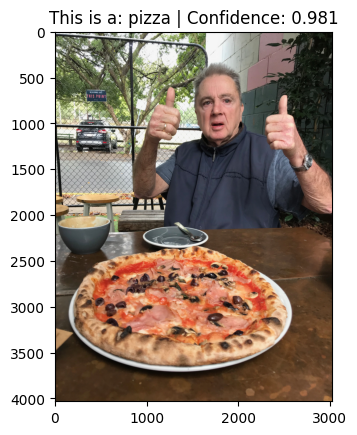

In [86]:
plt.imshow(img)
plt.title(f"This is a: {class_names[label]} | Confidence: {torch.softmax(logits,dim=1).max():.3f}")